In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import xgboost as xgb

In [3]:
#Read dataset
df = pd.read_csv("/content/heart (1).csv")

In [4]:
y = df.target
X = df.drop(["target"], axis=1)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [6]:
classifier = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, monotone_constraints='(1,-1)',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)


In [8]:
classifier.fit(X_train,y_train)

XGBClassifier(colsample_bytree=0.3, gamma=0.2, gpu_id=0,
              interaction_constraints='', max_depth=6,
              monotone_constraints='(1,-1)', n_jobs=0, num_parallel_tree=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [9]:
predictions = classifier.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.70%


In [12]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
25,61,0,0,145,307,0,0,146,1,1.0,1,0,3
72,56,1,0,125,249,1,0,144,1,1.2,1,1,2
532,63,0,0,124,197,0,1,136,1,0.0,1,0,2
44,55,0,1,132,342,0,1,166,0,1.2,2,0,2
296,67,1,0,120,237,0,1,71,0,1.0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41,1,2,130,214,0,0,168,0,2.0,1,0,2
71,61,1,0,140,207,0,0,138,1,1.9,2,1,3
106,51,1,0,140,299,0,1,173,1,1.6,2,0,3
270,43,1,0,110,211,0,1,161,0,0.0,2,0,3


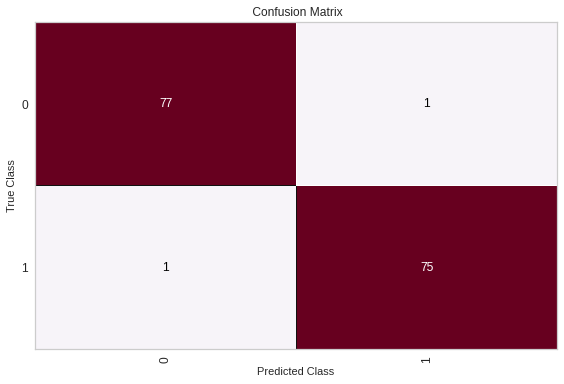

In [16]:
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
logmatrix = ConfusionMatrix(classifier, cmap='PuRd',
                            title=' Confusion Matrix')
logmatrix.fit(X_train, y_train)
logmatrix.score(X_test, y_test)
logmatrix.finalize()